confusion matrix (혼돈 행렬) : TP(True Positive), FP(False Positive), TN(True Negative), FN(False Negative)

TP : True (정답) Positive(정답 예측)

TN : True (정답) Negative(오답 예측)

FP : False (오답) Positive(정답 예측)

FN : False (오답) Negative(오답 예측)

---

Precision = TP / (TP + FP) : true 로 분류한 것 중 정답 비율

Recall = TP / (TP + fn) : 실제 true 중 true로 예측한 비율

TPR : True (정답) Positive (정답 예측) Rate

FPR : False (오답) Positive (정답 예측) Rate

precision_recall_curve 

threshold 기준으로 Positive, Negative 예측

threshold가 높아지면 precision이 높아짐 : FP 낮아짐(오답을 정답이라고 예측) = FN 높아짐(오답을 오답이라 예측) -> FPR 낮아짐
-> 여학생을 여학생이라고 잘 예측함 (대부분 여학생)

threshold가 낮아지면 recall이 높아짐 : FP 높아짐 = FN 낮아짐 -> FPR 높아짐
-> 남학생도 여학생이라고 예측함

여학생을 여대로 진학시키려 할 때, threshold를 어디로 보내야 할까? -> 오른쪽 (여학생을 여학생이라고 잘 예측해야 되니까 - 남학생을 여대로 보내면 안됨!)

여학생들에게 머리핀 선물을 해줘야 한다면 threshold를 어디로? -> 왼쪽 (남학생도 여학생이라고 예측되서 머리핀 받았다 쳐도, 큰 문제 없으니까)

---

accuracy (score) : 정답 / 전체 -> TP + TN / TP + TN + FP + FN

f1_score : Precision 과 Recal의 조화평균 2 * (precision * recall / precision + recall)
- Precision (정밀도) : TP / TP + fp -> true 로 분류한 것 중 정답 비율
- Recall (재현률 / 민감도) : TP / TP + FN -> 실제 true 중 true로 예측한 비율

ROC curve / AUC
- TPR(True Positive Rate) : TP / TP + FN = recall
- FPR(False Positive Rate) : FP / FP + TN = 실제 false 중 false로 예측한 비율
- ROC( Receiver Operating Characteristic ) :  재현률을 좀더 명확하게 판단하기 위한 것 -> 판별기준이 낮을 수록 Positive로 예측하는 수가 증가한다.
- ROC는 0 ~ 1까지의 그래프로 그려진다. (비율이니까)
- AUC (Area Under the ROC Curve) 는 1인 경우에 가장 분류 모델의 성능이 좋다고 판단한다.
- AUC  0.5 보다 크면 무작위로 만든 분류모델보다는 성능이 좋다고 판단한다.
  반대로 낮다면 분류모델에 문제가 있다라고 판단한다.


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
iris = load_iris()

In [ ]:
# 1. 데이터 준비
x = iris.data
y = iris.target

In [ ]:
# 2. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# 3. model 선택
model = LogisticRegression()

In [ ]:
# 4. model 학습
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# 5. 예측
predict = model.predict(x_test)

In [ ]:
# confusion matrix() 함수가 TN, FP, FN, TP을 계산해준다. 
cm = confusion_matrix(y_test, predict)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

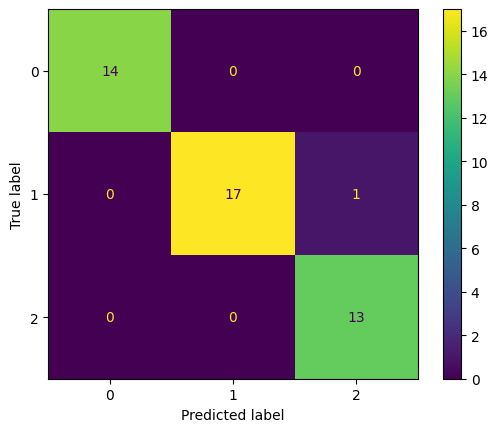

In [ ]:
# Coufusion Matrix를 화면으로 표현한다.
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# 각 항목별 Y축 정밀도를 확인해 본다.
precision = precision_score(y_test, predict, average=None)

for target, score, in zip(iris.target_names, precision):
    print(f"{target}의 정밀도 : {score}")

setosa의 정밀도 : 1.0
versicolor의 정밀도 : 1.0
virginica의 정밀도 : 0.9285714285714286


In [ ]:
# 각 항목별 X축 재현율 확인해본다.
recall = recall_score(y_test, predict, average=None)

for target, score, in zip(iris.target_names, recall):
    print(f"{target}의 재현률 : {score}")

setosa의 재현률 : 1.0
versicolor의 재현률 : 0.9444444444444444
virginica의 재현률 : 1.0


In [ ]:
# 각 항목별 Precision 과 Recall의 조화평균을 확인 해본다.
f1 = f1_score(y_test, predict, average=None)

for target, score, in zip(iris.target_names, f1):
    print(f"{target}의 f1 : {score}")

setosa의 f1 : 1.0
versicolor의 f1 : 0.9714285714285714
virginica의 f1 : 0.9629629629629629


In [ ]:
# 전체 데이터 중 얼마나 정확하게 예측했는지 정확도를 확인 해본다.
accuracy = accuracy_score(y_test, predict)
print(f"score : {accuracy}")

score : 0.9777777777777777


In [ ]:
# 위에서 알아본 각 항목을 데이터화 하여 확인해본다.
report = classification_report(y_test, predict, output_dict=True)
print(report)

df = pd.DataFrame(report)
df.rename(columns=dict(zip(["0", "1", "2"], iris.target_names)), inplace=True)
df

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14.0}, '1': {'precision': 1.0, 'recall': 0.9444444444444444, 'f1-score': 0.9714285714285714, 'support': 18.0}, '2': {'precision': 0.9285714285714286, 'recall': 1.0, 'f1-score': 0.9629629629629629, 'support': 13.0}, 'accuracy': 0.9777777777777777, 'macro avg': {'precision': 0.9761904761904763, 'recall': 0.9814814814814815, 'f1-score': 0.9781305114638448, 'support': 45.0}, 'weighted avg': {'precision': 0.9793650793650793, 'recall': 0.9777777777777777, 'f1-score': 0.9778718400940623, 'support': 45.0}}


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.928571,0.977778,0.976190,0.979365
recall,1.0,0.944444,1.000000,0.977778,0.981481,0.977778
f1-score,1.0,0.971429,0.962963,0.977778,0.978131,0.977872
support,14.0,18.000000,13.000000,0.977778,45.000000,45.000000


In [ ]:
# predict_proba 함수는 입력 샘플에 대해 클래스별 확률을 반환합니다.
# predict_proba 함수를 사용하는 것은 양성(1)확률을 물을때나 평가지표가 roc-auc 이면 사용한다.
proba = model.predict_proba(x_test)
proba

array([[9.85025390e-01, 1.49745257e-02, 8.47913603e-08],
       [2.73870313e-01, 7.22403400e-01, 3.72628731e-03],
       [6.87874268e-03, 8.67910243e-01, 1.25211014e-01],
       [9.85580986e-01, 1.44187890e-02, 2.25309060e-07],
       [1.61763052e-06, 1.99353083e-02, 9.80063074e-01],
       [4.82077317e-03, 5.87872665e-01, 4.07306561e-01],
       [1.74155378e-04, 1.29200275e-01, 8.70625569e-01],
       [9.58218366e-01, 4.17781089e-02, 3.52554587e-06],
       [9.68302334e-01, 3.16968243e-02, 8.41647595e-07],
       [1.34382944e-05, 3.10694866e-02, 9.68917075e-01],
       [1.98946719e-02, 8.69217029e-01, 1.10888299e-01],
       [9.67083174e-01, 3.29154278e-02, 1.39858787e-06],
       [7.00813317e-06, 3.82223936e-02, 9.61770598e-01],
       [7.71311081e-03, 7.66892586e-01, 2.25394303e-01],
       [7.47575021e-03, 7.31252706e-01, 2.61271543e-01],
       [9.87344785e-01, 1.26550182e-02, 1.97259603e-07],
       [2.35786708e-02, 9.29632518e-01, 4.67888116e-02],
       [1.15650090e-02, 6.62101

In [ ]:
# 위에서 만든 데이터의 형태
print(f"shape : {proba.shape}")
print(f"sum : {proba.sum(axis=1)}")

shape : (45, 3)
sum : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


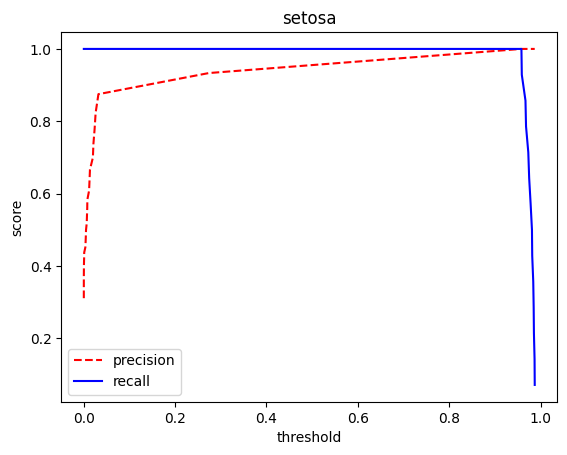

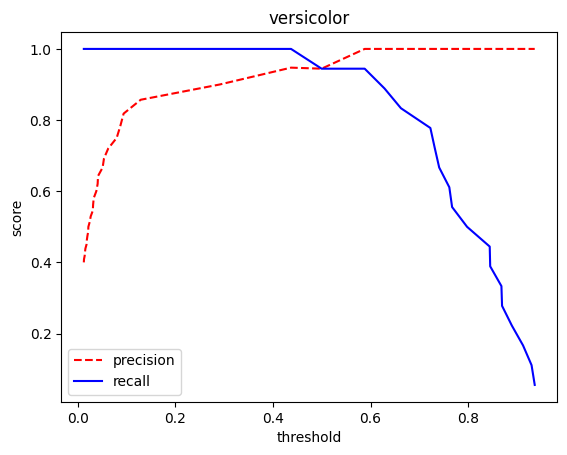

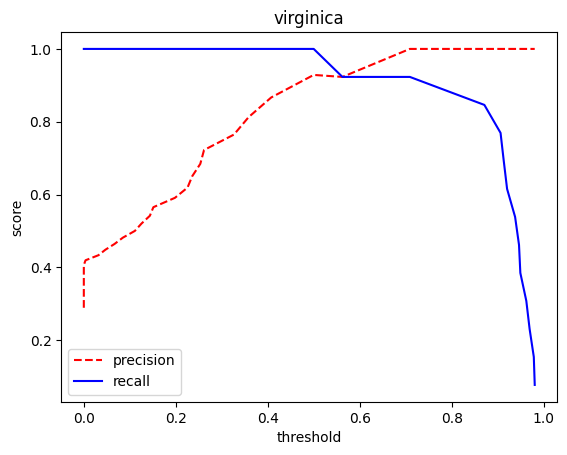

In [ ]:
# 특정 품종(i)에 대해, 임계값(Threshold)을 아주 조금씩 바꿔가면서 그에 따라 변하는 정밀도(Precision)와 재현율(Recall) 값을 모두 계산해 줍니다.
for i in range(len(iris.target_names)):
    precision, recall, thersholds = precision_recall_curve(y_test, proba[:, int(i)], pos_label=int(i))

    plt.xlabel("threshold")
    plt.ylabel("score")
    plt.plot(thersholds, precision[: len(thersholds)], "red", linestyle="--", label="precision")
    plt.plot(thersholds, recall[: len(thersholds)], "blue", label ="recall")

    plt.legend()
    plt.title(iris.target_names[i])
    plt.show()
# Setosa (세토사) : threshold가 0부터 0.9 후반까지 거의 모든 구간에서 정밀도와 재현율 모두 1.0(100%)에 가깝습니다. 이는 모델이 Setosa 품종을 다른 두 품종과 헷갈리는 일이 거의 없다는 것을 의미합니다. 
# Versicolor (버시컬러) : threshold를 낮추면(왼쪽으로 가면) 재현율은 높지만(파란선↑) 정밀도가 낮습니다(빨간선↓). 즉, **"일단 Versicolor를 하나도 놓치지 말자!"**는 전략이지만, 다른 품종(주로 Virginica)을 Versicolor로 잘못 판단하는 경우가 많아집니다.
# Virginica (버지니카) : Versicolor와 유사하게, 뚜렷한 상충 관계를 보입니다.

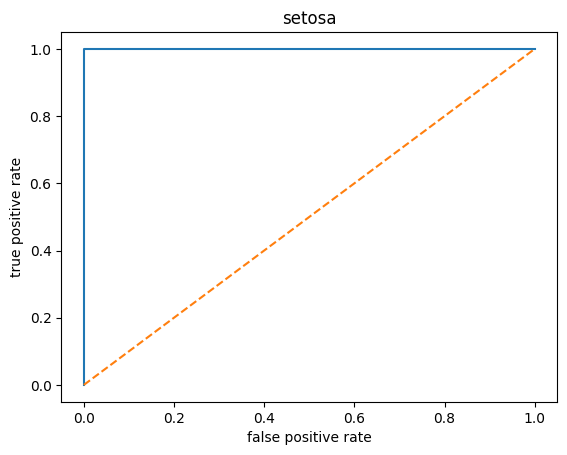

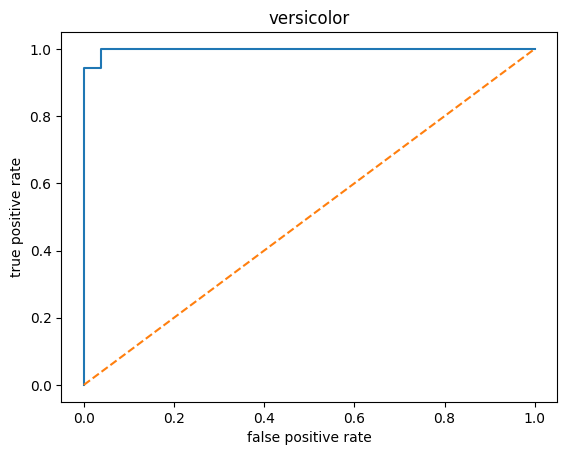

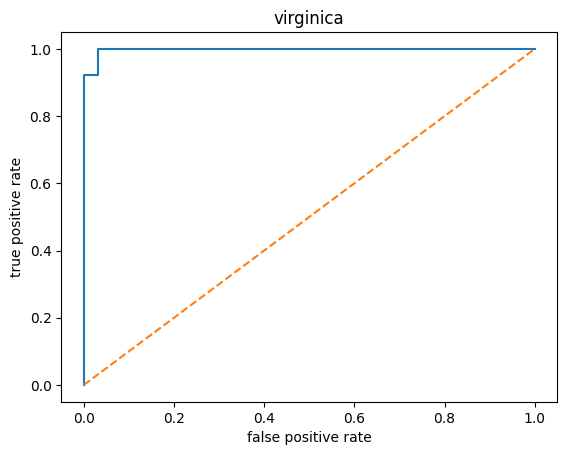

In [ ]:
# 특정 클래스에 대한 ROC 곡선을 그리는 데 필요한 값들을 계산합니다. 분류 **임계값(threshold)**을 계속 바꿔가면서 **진짜 양성 비율(TPR)**과 **가짜 양성 비율(FPR)**이 어떻게 변하는지를 계산해 줍니다.
for i in range(len(iris.target_names)):
    fprs, tprs, thresholds = roc_curve(y_test, proba[:, int(i)], pos_label=int(i))
    plt.plot(fprs, tprs)

    plt.plot([0, 1], [0, 1], "--")
    plt.title(iris.target_names[i])

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")

    plt.show()
# Setosa (세토사) : 이 모델은 가짜 양성 비율(FPR)을 거의 0.0으로 유지하면서, 진짜 양성 비율(TPR) 1.0을 달성할 수 있습니다. 이는 모델이 Setosa를 다른 두 품종과 매우 높은 정확도로 구별할 수 있다
# Versicolor (버시컬러) : 매우 높은 TPR(예: 모든 Versicolor의 95%를 찾아냄)을 달성하려면, 작지만 0이 아닌 FPR(예: 다른 꽃을 Versicolor로 잘못 분류할 확률 5%)을 감수해야 합니다.
# Virginica (버지니카) : 모든 Virginica를 정확하게 식별하는 것(이익)과 오분류를 피하는 것(비용) 사이에는 약간의 상충 관계가 존재합니다. 이는 Versicolor와 Virginica의 특징이 서로 비슷하여 모델이 두 품종을 구분하는 데 약간의 어려움을 겪고 있음을 시사합니다.

In [ ]:
# 전체적인 성능을 하나의 숫자로 요약하기 위해 ROC AUC 점수를 계산
# y_test: 실제 정답 값 
# proba: 모델이 예측한 확률 값 
# ovo(One-vs-One) : 모든 클래스 조합에 대해 일대일로 AUC 점수를 각각 계산한 뒤, 그 점수들의 평균을 내는 방식
roc_auc = roc_auc_score(y_test, proba, multi_class="ovo")
roc_auc

np.float64(0.9985754985754985)